# Project: Investigate a Dataset - [TMDB 5000 Movie]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>


<a id='intro'></a>
## Introduction

### TMDB 5000 Movie Dataset Description 

> What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over$100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?
This is a great place to start digging in to those questions, with data on the plot, cast, crew, budget, and revenues of several thousand films.
> ### Columns:
>* homepage
>* id
>* original_title
>* overview
>* popularity
>* production_companies
>* production_countries
>* release_date
>* spoken_languages
>* status
>* tagline
>* vote_average

### Question(s) for Analysis
>* **Q1** Which month had the most number of movies released on it?
>* **Q2** What is the popular vote average for the movies?
>* **Q3** How many number of the movies get good result of the vote rate(Including number of gains and losses?
>* **Q4** What is the most common runtime interval for all movies?
>* **Q5** What is the most genre popular?
>* **Q6** Was there a change in the number of movies released over time?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling 

In [2]:
#Read dataset of medical appointments
df=pd.read_csv('tmdb-movies (1).csv')

pd.set_option("max_columns", None) # show all cols
pd.set_option('max_colwidth', None) # show full width of showing cols
pd.set_option("expand_frame_repr", False) # print cols side by side as it's supposed to be

df.head(50)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,"Twenty-two years after the events of Jurassic Park, Isla Nublar now features a fully functioning dinosaur theme park, Jurassic World, as originally envisioned by John Hammond.",124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,"An apocalyptic story set in the furthest reaches of our planet, in a stark desert landscape where humanity is broken, and most everyone is crazed fighting for the necessities of life. Within this world exist two rebels on the run who just might be able to restore order. There's Max, a man of action and a man of few words, who seeks peace of mind following the loss of his wife and child in the aftermath of the chaos. And Furiosa, a woman of action and a woman who believes her path to survival may be achieved if she can make it across the desert back to her childhood homeland.",120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Productions,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dystopic future,Beatrice Prior must confront her inner demons and continue her fight against a powerful alliance which threatens to tear her society apart.,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley,http://www.starwars.com/films/star-wars-episode-vii,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,"Thirty years after defeating the Galactic Empire, Han Solo and his allies face a new threat from the evil Kylo Ren and his army of Stormtroopers.",136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Toretto and his family for his comatose brother.,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhnall Gleeson|Paul Anderson,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",father-son relationship|rape|based on novel|mountains|winter,"In the 1820s, a frontiersman, Hugh Glass, sets out on a path of vengeance against those who left him for dead after a bear mauling.",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anonymous Content|New Regency Pictures,12/25/15,3929,7.2,2015,1.241999

In [3]:
df.tail(50)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10816,16378,tt0077147,0.064602,0,0,The Rutles: All You Need Is Cash,Eric Idle|John Halsey|Ricky Fataar|Neil Innes|Michael Palin,NaN,Eric Idle|Gary Weis,NaN,musical|mockumentary,The story of the rise and fall of the Pre-Fab Four.,76,Comedy,NaN,3/22/78,14,6.0,1978,0.000000e+00,0.000000e+00
10817,13963,tt0077838,0.064029,0,321952,The Last Waltz,Robbie Robertson|Rick Danko|Levon Helm|Richard Manuel|Garth Hudson,http://www.mgm.com/#/our-titles/1092/The-Last-Waltz/,Martin Scorsese,It Started as a Concert. It Became a Celebration.,1970s|music,"Martin Scorsese's rockumentary intertwines footage from ""The Band's"" incredible farewell tour with probing backstage interviews and featured performances by Eric Clapton, Bob Dylan, Joni Mitchell, Ringo Starr and other rock legends.",117,Documentary|Music,FM Productions|Last Waltz Inc.,5/1/78,33,8.0,1978,0.000000e+00,1.076189e+06
10818,39995,tt0079482,0.047645,0,0,Long Weekend,John Hargreaves|Briony Behets|Mike McEwen|Roy Day|Michael Aitkens,NaN,Colin Eggleston,Their crime was against nature. Nature found them guilty.,beach|camping|attack|nature,"When a suburban couple go camping for the weekend at a remote beach, they discover that nature isn't in an accommodating mood.",92,Horror|Thriller|Mystery,The Australian Film Commission|Victorian Film|Dugong Films,10/14/78,17,6.1,1978,0.000000e+00,0.000000e+00
10819,16214,tt0077696,0.044675,0,78000000,Hooper,Burt Reynolds|Robert Klein|Adam West|Jan-Michael Vincent|Sally Field,http://en.wikipedia.org/wiki/Hooper_(film),Hal Needham,The greatest stuntman alive!,stuntman|hollywood,"Burt Reynolds plays a legendary stunt man known as Sonny Hooper, who remains one of the top men in his field, but due to too many stressful impacts to the spine and the need to pop pain killers several times a day, he knows he should get out of the industry before he ends up permanently disabled.",107,Action|Comedy,Warner Bros.,7/28/78,13,6.0,1978,0.000000e+00,2.607307e+08
10820,13377,tt0060345,1.227582,315000,0,How the Grinch Stole Christmas!,Boris Karloff|June Foray|Thurl Ravenscroft|Dal McKennon,NaN,Chuck Jones|Ben Washam,"You're a mean one, Mr. Grinch",holiday|based on novel|monster|obsession|santa claus,"Bitter and hateful, the Grinch is irritated at the thought of the nearby village having a happy time celebrating Christmas. So disguised as Santa Claus, with his dog made to look like a reindeer, he raids the village to steal all the Christmas things. The village is sure to have a sad Christmas this year.",26,Animation|Family|Comedy,MGM Television|The Cat in the Hat Productions,12/18/66,286,7.1,1966,2.116175e+06,0.000000e+00
10821,1714,tt0060390,0.929393,0,0,Fahrenheit 451,Oskar Werner|Julie Christie|Cyril Cusack|Bee Duffell|Jeremy Spenser,NaN,FranÃ§ois Truffaut,Aflame with the excitement and emotions of tomorrow!,totalitarian regime|firemen|dystopia|book burning|dystopic future,"In the future, an oppressive government maintains control of public opinion by outlawing literature and maintaining a group of enforcers known as ""firemen"" to perform the necessary book burnings. Fireman Montag begins to question the morality of his vocation. Curious about the world of books, he soon falls in love with a beautiful young member of a pro-literature underground - and with literature itself.",112,Drama|Science Fiction,Anglo Enterprises|Vineyard Film Ltd.,9/6/66,93,6.8,1966,0.000000e+00,0.000000e+00
10822,396,tt0061184,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|Sandy Dennis|Agnes Flanagan,NaN,Mike Nichols,You are cordially invited to George and Martha's for an evening of fun and games,alcohol|adultery|professor|married couple|son,Mike Nicholsâ€™ film from Edward Albee's play brought new themes to the film industry. E

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.shape

(10866, 21)

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### Data Cleaning

In [8]:
# Change datatype
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].dtype.type

df['popularity'] = df['popularity'].astype('int32')

In [9]:
#Finding duplicated values in a DataFrame
df.duplicated().any()
df.duplicated()

df['id'].is_unique
duplicate = df[df.duplicated('id')]
 
# Print the resultant Dataframe
duplicate


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian Anthony Dale|Luke Goss,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|martial arts tournament,"In the year of 2039, after World Wars destroy much of the civilization as we know it, territories are no longer run by governments, but by corporations; the mightiest of which is the Mishima Zaibatsu. In order to placate the seething masses of this dystopia, Mishima sponsors Tekken, a tournament in which fighters battle until only one is left standing.",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0


In [10]:
# Finding missing elements in a DataFrame
df.isnull()
df.isna().any()
df.isna().sum()

df.fillna({'imdb_id':'Not Stated','cast':'Not Stated','homepage':'Not Stated','director':'Not Stated','tagline':'Not Stated',
           'overview':'Not Stated','genres':'Not Stated','production_companies':'Not Stated','keywords':0}, inplace=True)


df.loc[df['cast']=='Not Stated']


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,345637,tt4661600,0,0,0,Sanjay's Super Team,Not Stated,Not Stated,Sanjay Patel,Not Stated,0,"Sanjay's Super Team follows the daydream of a young Indian boy, bored with his father's religious meditation, who imagines ""a kind of ancient, Hindu version of The Avengers, with the gods appearing like superheros.",7,Animation,Pixar Animation Studios,2015-11-25,47,6.9,2015,0.000000,0.0
441,355020,tt4908644,0,0,0,Winter on Fire: Ukraine's Fight for Freedom,Not Stated,http://www.netflix.com/title/80031666,Evgeny Afineevsky,The Next Generation Of Revolution,0,"A documentary on the unrest in Ukraine during 2013 and 2014, as student demonstrations supporting European integration grew into a violent revolution calling for the resignation of President Viktor F. Yanukovich.",98,Documentary,Passion Pictures|Campbell Grobman Films|Afineevsky - Tolmor Production|Pray for Ukraine Production|Rock Paper Scissors,2015-10-09,37,8.2,2015,0.000000,0.0
465,321109,tt4393514,0,0,0,Bitter Lake,Not Stated,Not Stated,Adam Curtis,Not Stated,manipulation|politics|war|control|fear,An experimental documentary that explores Saudi Arabia's relationship with the U.S. and the role this has played in the war in Afghanistan.,135,Documentary,BBC,2015-01-24,19,7.8,2015,0.000000,0.0
536,333350,tt3762974,0,0,0,A Faster Horse,Not Stated,Not Stated,David Gelb,Not Stated,mustang|car|corporation|henry ford family|car factory,"David Gelb (Jiro Dreams of Sushi) tackles another venerable, beloved, and long-standing institution: the Mustang, crown jewel of the Ford fleet. Only this institution is in turmoil. As the fiftieth anniversary of the Mustang approaches and the car industry struggles through the deepest trough of the financial crisis, Ford launches a redesign. Now the jobs of workers at Fordâ€™s Flat Rock Assembly Plant, the expectations of the thousands of Mustang devotees, and the livelihood of the city of Detroit are all placed squarely on the shoulders of Dave Pericak. As chief program engineer, he will guide the 2015 Mustang from assembly floor to showroomâ€”if only he can get that vibration out of the steering wheel.",90,Documentary,Not Stated,2015-10-08,12,8.0,2015,0.000000,0.0
538,224972,tt3983674,0,0,0,The Mask You Live In,Not Stated,http://themaskyoulivein.org,Jennifer Siebel Newsom,"Is american masculinity harming our boys, men and society at large?",feminism|sexism|young boy|gender roles|misogyny,"Compared to girls, research shows that boys in the U.S. are more likely to be diagnosed with a behavior disorder, prescribed stimulant medications, fail out of school, binge drink, commit a violent crime, and/or take their own lives. Jennifer Siebel Newsom's new documentary film, The Mask You Live In, asks: As a society, how are we failing our boys?",88,Documentary,Not Stated,2015-01-01,11,8.9,2015,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677,13926,tt0093832,0,0,0,Red's Dream,Not Stated,Not Stated,John Lasseter,Not Stated,0,"Life as the sole sale item in the clearance corner of Eben's Bikes can get lonely. So Red, a unicycle, dreams up a clown owner and his own juggling act that steals the show. But all too soon, the applause turns into the sound of rainfall, as reality rushes back. Red must resign himself to sitting in the corner and await his fate.",4,Animation,Pixar Animation Studios,1987-08-17,44,6.6,1987,0.000000,0.0
9755,48714,tt0061402,0,0,0,The Big Shave,Not Stated,Not Stated,Martin Scorsese,Not Stated,0,"This short film is a metaphor for the Vietnam War. A man walks into a meticulously clean and sterile bathroom, concentrating on the polished porcelain and shiny metal motif. He then proceeds to shave. When his face is clean, however, he only continues to shave until he pierces through hi

In [11]:
#Dropping Columns in a DataFrame
>>> to_drop = ['cast',
...            'homepage',
...            'tagline',
...            'overview',
...            'budget_adj',
...            'revenue_adj',
                "keywords"]

>>> df.drop(to_drop, inplace=True, axis=1)

In [12]:
# delete all rows with column 'production_companies' has value "Not Stated"
index_production_companies = df[df['production_companies'] == "Not Stated"].index
df.drop(index_production_companies , inplace=True)


In [13]:
df.head(50)

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,tt0369610,32,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu,2015-06-09,5562,6.5,2015
1,76341,tt1392190,28,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Productions,2015-05-13,6185,7.1,2015
2,262500,tt2908446,13,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel,2015-03-18,2480,6.3,2015
3,140607,tt2488496,11,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,tt2820852,9,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films,2015-04-01,2947,7.3,2015
5,281957,tt1663202,9,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anonymous Content|New Regency Pictures,2015-12-25,3929,7.2,2015
6,87101,tt1340138,8,155000000,440603537,Terminator Genisys,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015
7,286217,tt3659388,7,108000000,595380321,The Martian,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott Free Productions|Mid Atlantic Films|International Traders|TSG Entertainment,2015-09-30,4572,7.6,2015
8,211672,tt2293640,7,74000000,1156730962,Minions,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015
9,150540,tt2096673,6,175000000,853708609,Inside Out,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|Walt Disney Studios Motion Pictures,2015-06-09,3935,8.0,2015


In [14]:
#percentage of the null elements
rows, columns = df.shape
cell_count = rows * columns
number_of_nulls = df.isnull().sum().sum()
percentage_of_missing = (number_of_nulls / cell_count) * 100
print(f'Percentage of missing values: {percentage_of_missing}%')

Percentage of missing values: 0.0%


In [15]:
# genres Column 

def get_genre(row, genre_index):
    array_genres = row['genres'].split('|')

    if len(array_genres) == 0:
        return ''
    else:
        return array_genres[genre_index]

df['genre_1'] = df.apply(lambda row: get_genre(row, 0), axis=1)

In [16]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,genre_1
0,135397,tt0369610,32,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu,2015-06-09,5562,6.5,2015,Action
1,76341,tt1392190,28,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Productions,2015-05-13,6185,7.1,2015,Action
2,262500,tt2908446,13,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel,2015-03-18,2480,6.3,2015,Adventure
3,140607,tt2488496,11,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,Action
4,168259,tt2820852,9,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films,2015-04-01,2947,7.3,2015,Action


In [17]:
df['release_year'].max()

2015

In [18]:
df['vote_average'].min()

1.5

In [19]:
df['vote_average'].mean()

5.967934119560805

In [20]:
df.loc[df['vote_average'] == df['vote_average'].max(), 'Vote_rate'] = 'Great' 
df.loc[df['vote_average'] >= df['vote_average'].mean(), 'Vote_rate'] = 'Good' 
df.loc[df['vote_average'] < df['vote_average'].mean(), 'Vote_rate'] = 'Bad' 
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,genre_1,Vote_rate
0,135397,tt0369610,32,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu,2015-06-09,5562,6.5,2015,Action,Good
1,76341,tt1392190,28,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Productions,2015-05-13,6185,7.1,2015,Action,Good
2,262500,tt2908446,13,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel,2015-03-18,2480,6.3,2015,Adventure,Good
3,140607,tt2488496,11,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,Action,Good
4,168259,tt2820852,9,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films,2015-04-01,2947,7.3,2015,Action,Good


In [21]:
vote = df.pivot_table(columns=['Vote_rate'], aggfunc='size')
print (vote)

Vote_rate
Bad     4599
Good    5237
dtype: int64


In [22]:
df.loc[df['revenue'] >= df['budget'],'Revenue_VS_Expenses'] = 'Gains' 
df.loc[df['revenue'] < df['budget'],'Revenue_VS_Expenses'] ='Losses' 
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,genre_1,Vote_rate,Revenue_VS_Expenses
0,135397,tt0369610,32,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu,2015-06-09,5562,6.5,2015,Action,Good,Gains
1,76341,tt1392190,28,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Productions,2015-05-13,6185,7.1,2015,Action,Good,Gains
2,262500,tt2908446,13,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel,2015-03-18,2480,6.3,2015,Adventure,Good,Gains
3,140607,tt2488496,11,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,Action,Good,Gains
4,168259,tt2820852,9,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films,2015-04-01,2947,7.3,2015,Action,Good,Gains


In [23]:
# calculate the average movie duration
print(df['runtime'].mean())
# print(df['runtime'].min())
# print(df['runtime'].max())

102.67608784058561


In [24]:

df.sort_values('runtime')

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,genre_1,Vote_rate,Revenue_VS_Expenses
5920,248842,tt2364006,0,0,0,The Food Guide to Love,Dominic Harari|Teresa Pelegri,0,Romance|Comedy,Haut et Court|Parallel Film Productions|Fox International Productions (FIP),2013-12-18,12,5.6,2013,Romance,Bad,Gains
445,353345,tt3800796,0,0,0,The Exorcism of Molly Hartley,Steven R. Monroe,0,Horror,WT Canada Productions,2015-10-09,52,5.0,2015,Horror,Bad,Gains
3857,289097,tt1288636,0,0,0,Cell 213,Stephen Kay,0,Horror,Access Motion Pictures,2011-06-10,13,5.2,2011,Horror,Bad,Gains
3329,20414,tt1077026,0,0,0,"Grande, grosso e Verdone",Carlo Verdone,0,Family,Filmauro,2008-03-07,35,5.3,2008,Family,Bad,Gains
1289,286372,tt1791681,0,3250000,0,Treehouse,Michael G. Bartlett,0,Thriller|Horror|Mystery,Tiberius Film,2014-10-20,16,3.4,2014,Thriller,Bad,Losses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,220903,tt1533395,0,0,0,Life,Martha Holmes|Simon Blakeney|Stephen Lyle,500,Documentary,British Broadcasting Corporation (BBC),2009-12-14,24,7.0,2009,Documentary,Good,Gains
2214,189197,tt0374463,0,120000000,0,The Pacific,Jeremy Podeswa|Tim Van Patten|David Nutter|Graham Yost|Carl Franklin|Tony To,540,War|Drama|Action|Adventure|History,Playtone|HBO|DreamWorks Television,2010-05-16,183,7.8,2010,War,Good,Losses
6176,42044,tt0090015,0,0,0,Shoah,Claude Lanzmann,566,Documentary,British Broadcasting Corporation (BBC)|MinistÃ¨re de la Culture de la Republique FranÃ§aise|Les Films Aleph|Historia,1985-11-01,16,8.3,1985,Documentary,Good,Gains
2722,331214,tt0185906,0,0,125000000,Band of Brothers,Phil Alden Robinson|Richard Loncraine|Mikael Salomon|David Nutter|Tom Hanks|David Leland|David Frankel|Tony To,705,Action|Drama|War,HBO,2001-09-09,313,8.0,2001,Action,Good,Gains


In [25]:
x = df["runtime"]  # your data, a column from a pandas dataframe
no_of_bins = 10       # the default value for the hist function
min_value = min(x)
max_value = max(x)
bin_size = (max_value - min_value)/no_of_bins
print("Bin size", bin_size)
print("Min value", min_value)
print("Max value", max_value)

# Show the bin boundary values
# initiate values
lower_boundary = min_value
upper_boundary = min_value + bin_size

for i in range(no_of_bins):    
    print("[", lower_boundary, "-", upper_boundary, "]")
    lower_boundary = upper_boundary
    upper_boundary = upper_boundary + bin_size

Bin size 87.7
Min value 0
Max value 877
[ 0 - 87.7 ]
[ 87.7 - 175.4 ]
[ 175.4 - 263.1 ]
[ 263.1 - 350.8 ]
[ 350.8 - 438.5 ]
[ 438.5 - 526.2 ]
[ 526.2 - 613.9000000000001 ]
[ 613.9000000000001 - 701.6000000000001 ]
[ 701.6000000000001 - 789.3000000000002 ]
[ 789.3000000000002 - 877.0000000000002 ]


In [26]:
# Work on the runtime column 
bins =pd.IntervalIndex.from_tuples([(0, 70), (71, 90), (91, 110), (111, 130), (131, 150), (151, 170)])
x = pd.cut(df["runtime"].to_list(),bins)
x.categories = ['0 to 70','70 to 90','90 to 110','110 to 130','130 to 150','150 to 170']
df['runtime'] = x
df.runtime

0        110 to 130
1        110 to 130
2        110 to 130
3        130 to 150
4        130 to 150
            ...    
10861     90 to 110
10862           NaN
10863     90 to 110
10864      70 to 90
10865      70 to 90
Name: runtime, Length: 9836, dtype: category
Categories (6, object): ['0 to 70' < '70 to 90' < '90 to 110' < '110 to 130' < '130 to 150' < '150 to 170']

In [27]:
Revenue_VS_Expenses = df.pivot_table(columns=['Revenue_VS_Expenses'], aggfunc='size')
print (Revenue_VS_Expenses)

Revenue_VS_Expenses
Gains     7563
Losses    2273
dtype: int64


In [28]:
Revenue_VS_Expenses = df.pivot_table(columns=['Revenue_VS_Expenses'], aggfunc='size')
print (Revenue_VS_Expenses)

Revenue_VS_Expenses
Gains     7563
Losses    2273
dtype: int64


In [29]:
genre = df.pivot_table(columns=['genre_1'], aggfunc='size')
print (genre)

genre_1
Action             1481
Adventure           551
Animation           364
Comedy             2087
Crime               362
Documentary         283
Drama              2228
Family              128
Fantasy             254
Foreign               6
History              39
Horror              853
Music                80
Mystery             118
Not Stated            9
Romance             161
Science Fiction     197
TV Movie             62
Thriller            474
War                  57
Western              42
dtype: int64


#### Correlation: straight to the point
######  0.9 to 1 positive or negative indicates a very strong correlation.
######  0.7 to 0.9 positive or negative indicates a strong correlation.
######  0.5 to 0.7 positive or negative indicates a moderate correlation.
######  0.3 to 0.5 positive or negative indicates a weak correlation.
######  0 to 0.3 positive or negative indicates a negligible correlation.
#### Resource : https://medium.com/brdata/correlation-straight-to-the-point-e692ab601f4c

In [30]:
# Calculate Correlation

# correlation between two columns
print(df['popularity'].corr(df['revenue']))
print(df['popularity'].corr(df['vote_count']))
print(df['revenue'].corr(df['vote_count']))

# get correlation between element wise
print(df.corr())

0.6466824547136676
0.7898066864795211
0.7886959491117685
                    id  popularity    budget   revenue  vote_count  vote_average  release_year
id            1.000000    0.021066 -0.137731 -0.096238   -0.028411     -0.081539      0.509625
popularity    0.021066    1.000000  0.506389  0.646682    0.789807      0.219851      0.100524
budget       -0.137731    0.506389  1.000000  0.731437    0.627410      0.092984      0.136720
revenue      -0.096238    0.646682  0.731437  1.000000    0.788696      0.189144      0.070722
vote_count   -0.028411    0.789807  0.627410  0.788696    1.000000      0.276606      0.123542
vote_average -0.081539    0.219851  0.092984  0.189144    0.276606      1.000000     -0.134674
release_year  0.509625    0.100524  0.136720  0.070722    0.123542     -0.134674      1.000000


In [31]:
# production_companies Column 

def get_production_companies(row, production_companies_index):
    array_production_companies = row['production_companies'].split('|')

    if len(array_production_companies) == 0:
        return ''
    else:
        return array_production_companies[production_companies_index]

df['production_companies_1'] = df.apply(lambda row: get_production_companies(row, 0), axis=1)

In [32]:
production_companies = df.pivot_table(columns=['production_companies_1'], aggfunc='size')
print (production_companies)

production_companies_1
10th Hole Productions                               2
120dB Films                                         3
1492 Pictures                                       4
1818                                                1
185 Trax                                            1
                                                   ..
teamWorx Produktion fÃ¼r Kino und Fernsehen GmbH    1
the filmgroup                                       1
thinkfilm                                           1
uFilm                                               3
í”„ë¡œë•ì…˜M                                        1
Length: 3057, dtype: int64


In [33]:
# Extract Month 

df['month'] = pd.DatetimeIndex(df['release_date']).month


In [34]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,genre_1,Vote_rate,Revenue_VS_Expenses,production_companies_1,month
0,135397,tt0369610,32,150000000,1513528810,Jurassic World,Colin Trevorrow,110 to 130,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu,2015-06-09,5562,6.5,2015,Action,Good,Gains,Universal Studios,6
1,76341,tt1392190,28,150000000,378436354,Mad Max: Fury Road,George Miller,110 to 130,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Productions,2015-05-13,6185,7.1,2015,Action,Good,Gains,Village Roadshow Pictures,5
2,262500,tt2908446,13,110000000,295238201,Insurgent,Robert Schwentke,110 to 130,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel,2015-03-18,2480,6.3,2015,Adventure,Good,Gains,Summit Entertainment,3
3,140607,tt2488496,11,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,130 to 150,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,Action,Good,Gains,Lucasfilm,12
4,168259,tt2820852,9,190000000,1506249360,Furious 7,James Wan,130 to 150,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films,2015-04-01,2947,7.3,2015,Action,Good,Gains,Universal Pictures,4


In [35]:
#Dropping Columns in a DataFrame
>>> to_drop = ['genres',
...            'production_companies',
...            'production_companies_1']

>>> df.drop(to_drop, inplace=True, axis=1)


In [36]:
df.rename(columns={"genre_1": "genres", "Revenue_VS_Expenses": "revenue_expenses",
                   "month": "release_month"})

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,genres,Vote_rate,revenue_expenses,release_month
0,135397,tt0369610,32,150000000,1513528810,Jurassic World,Colin Trevorrow,110 to 130,2015-06-09,5562,6.5,2015,Action,Good,Gains,6
1,76341,tt1392190,28,150000000,378436354,Mad Max: Fury Road,George Miller,110 to 130,2015-05-13,6185,7.1,2015,Action,Good,Gains,5
2,262500,tt2908446,13,110000000,295238201,Insurgent,Robert Schwentke,110 to 130,2015-03-18,2480,6.3,2015,Adventure,Good,Gains,3
3,140607,tt2488496,11,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,130 to 150,2015-12-15,5292,7.5,2015,Action,Good,Gains,12
4,168259,tt2820852,9,190000000,1506249360,Furious 7,James Wan,130 to 150,2015-04-01,2947,7.3,2015,Action,Good,Gains,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0,0,0,The Endless Summer,Bruce Brown,90 to 110,2066-06-15,11,7.4,1966,Documentary,Good,Gains,6
10862,20379,tt0060472,0,0,0,Grand Prix,John Frankenheimer,NaN,2066-12-21,20,5.7,1966,Action,Bad,Gains,12
10863,39768,tt0060161,0,0,0,Beregis Avtomobilya,Eldar Ryazanov,90 to 110,2066-01-01,11,6.5,1966,Mystery,Good,Gains,1
10864,21449,tt0061177,0,0,0,"What's Up, Tiger Lily?",Woody Allen,70 to 90,2066-11-02,22,5.4,1966,Action,Bad,Gains,11


<a id='eda'></a>
## Exploratory Data Analysis

### Q1: Which month had the most number of movies released on it?

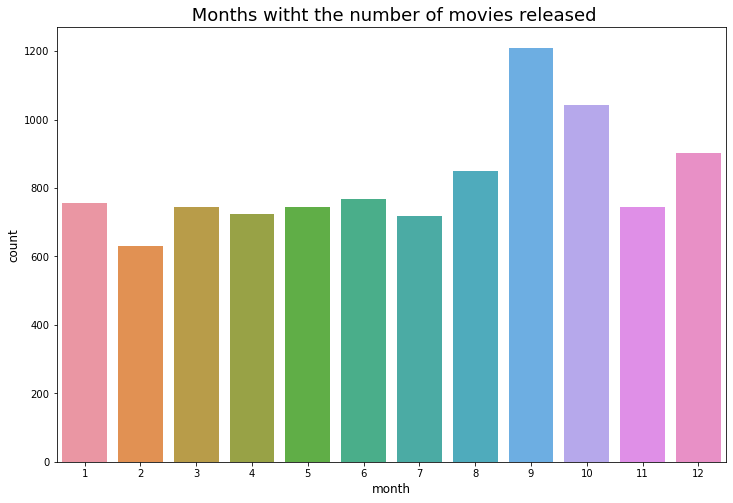

In [37]:
# count plot along y axis
plt.figure(figsize = [12, 8])
plt.title(" Months witht the number of movies released", fontsize=18); plt.ylabel('count of movies',fontsize=12);
plt.xlabel('Month',fontsize=12);
sn.countplot(x ='month', data = df)
 
# Show the plot
plt.show()

#### ANS_Q1:  The month with the most movies released on it was September.

### Q2:  What is the popular vote average for the movies?

<AxesSubplot:title={'center':'What is the popular vote average '}, xlabel='vote average', ylabel='count of movies'>

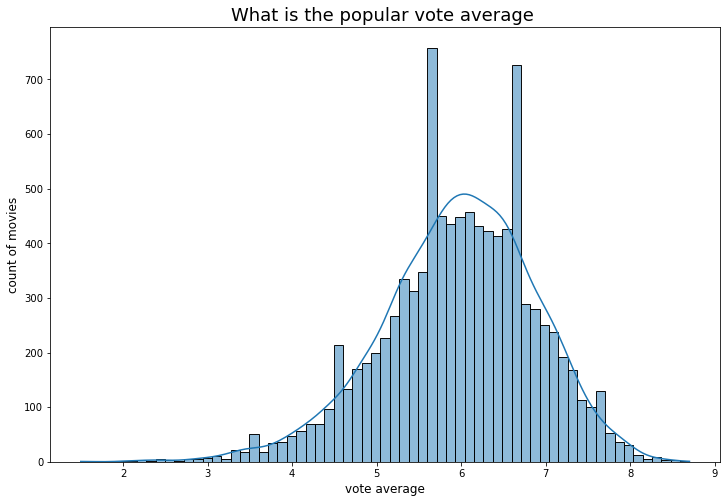

In [38]:
plt.figure(figsize = [12, 8])
plt.title("What is the popular vote average ", fontsize=18); plt.ylabel('count of movies',fontsize=12);
plt.xlabel('vote average',fontsize=12);

sn.histplot(x='vote_average', data=df, kde=True)

##### Ans_Q2  : The interval from 5.8 to 6.8 was the most popular vote average for all movies 

### Q3: How many number of the movies get good result of the vote rate(Including number of gains and losses?

<AxesSubplot:xlabel='Vote_rate'>

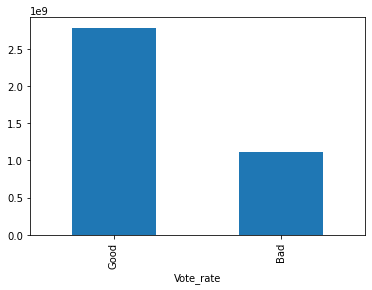

In [39]:
df.groupby("Vote_rate").revenue.max().sort_values(ascending=False)[:5].plot.bar()

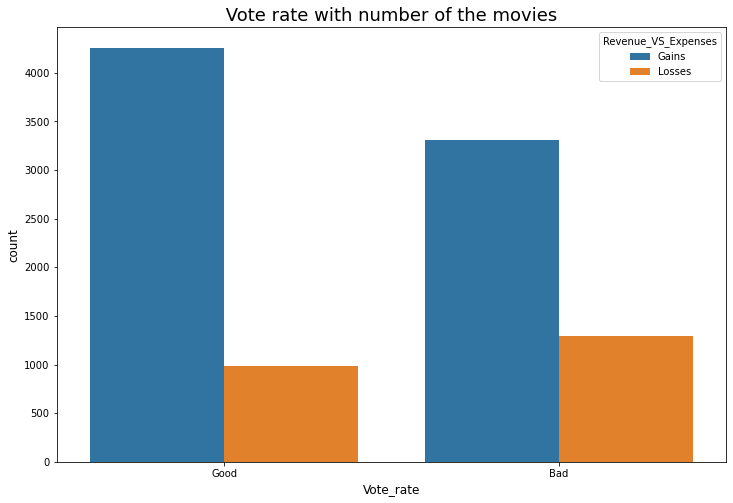

In [40]:
plt.figure(figsize = [12, 8])
plt.title(" Vote rate with number of the movies ", fontsize=18); plt.ylabel('count of movies',fontsize=12);
plt.xlabel('Vote rate',fontsize=12);
# count plot along y axis
sn.countplot(x ='Vote_rate', hue = "Revenue_VS_Expenses", data = df)
 
# Show the plot
plt.show()

#### Ans_Q3: there is 5000 movies get good rating Including  4000 movie that was gains and 1000 movie that losses

### What is the most common runtime interval for all movies?

<AxesSubplot:title={'center':' Rruntime '}, xlabel='Duration (Minutes)', ylabel='Count of movies'>

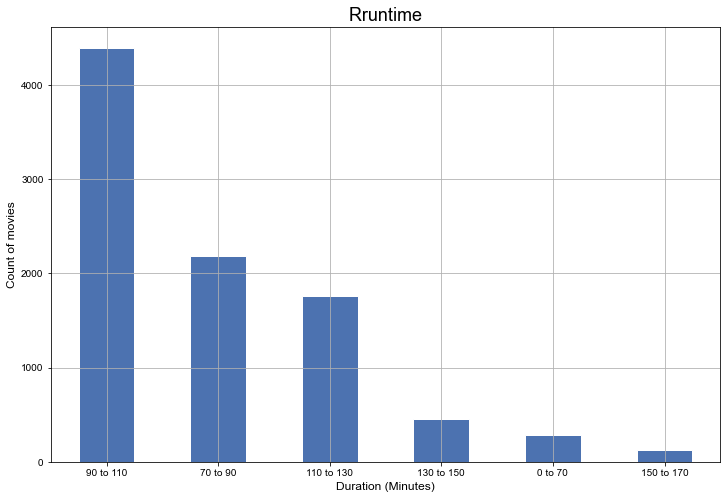

In [41]:
# Bar chart for runtime 
plt.figure(figsize = [12, 8])
plt.title(" Rruntime ", fontsize=18); plt.ylabel('Count of movies',fontsize=12);
plt.xlabel('Duration (Minutes)',fontsize=12);

sn.set(font_scale=1.4)
df['runtime'].value_counts().plot(kind='bar', rot=0)

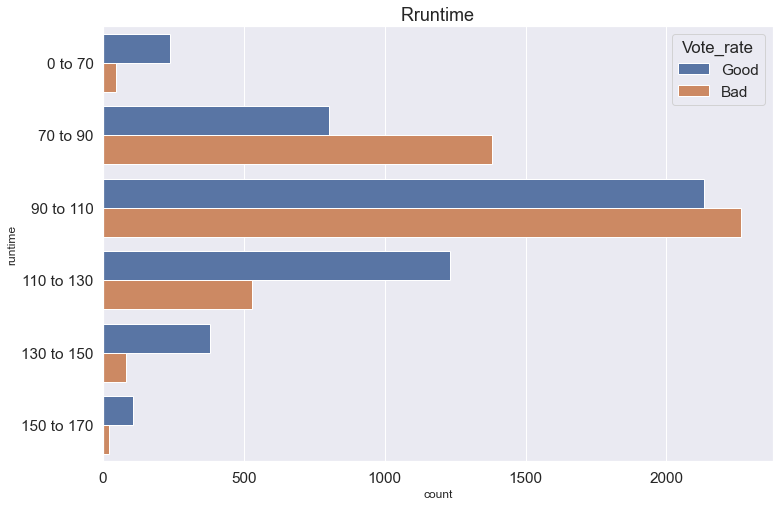

In [42]:
# Bar chart for runtime 
plt.figure(figsize = [12, 8])
plt.title(" Rruntime ", fontsize=18); plt.ylabel('Count of movies',fontsize=12);
plt.xlabel('Duration (Minutes)',fontsize=12);
# count plot along y axis
sn.countplot(y ='runtime', hue = "Vote_rate", data = df)
 
# Show the plot
plt.show()

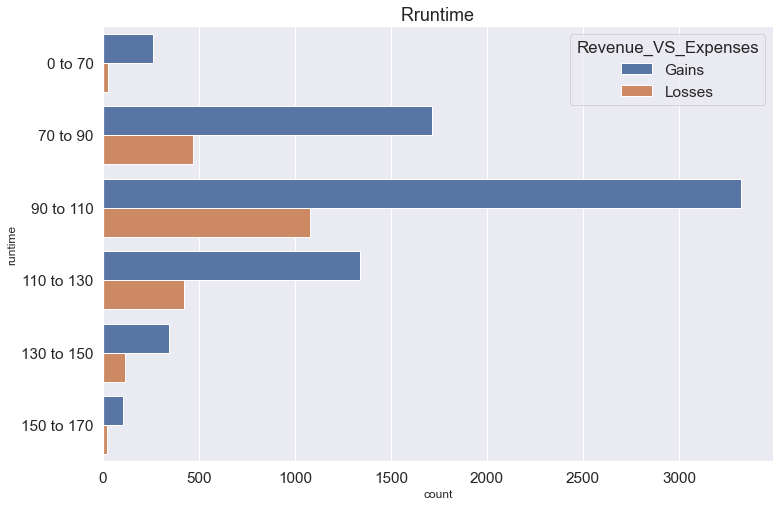

In [43]:
# Bar chart for runtime 
plt.figure(figsize = [12, 8])
plt.title(" Rruntime ", fontsize=18); plt.ylabel('Count of movies',fontsize=12);
plt.xlabel('Duration (Minutes)',fontsize=12);
# count plot along y axis
sn.countplot(y ='runtime', hue = "Revenue_VS_Expenses", data = df)
 
# Show the plot
plt.show()

#### Ans_Q4:  the most popular interval runtime was between 90 to 110 per minute, and we were trying to explore their relationship with vote rate and revenue_vs_expenses so we configure that when the move runtime interval increases the bad vote decrease, and for the revenue_vs_expenses it is a normal relationship.

### Q5: What is the most genre popular?

<AxesSubplot:title={'center':' Genre '}, xlabel='Genre', ylabel='Count of movies'>

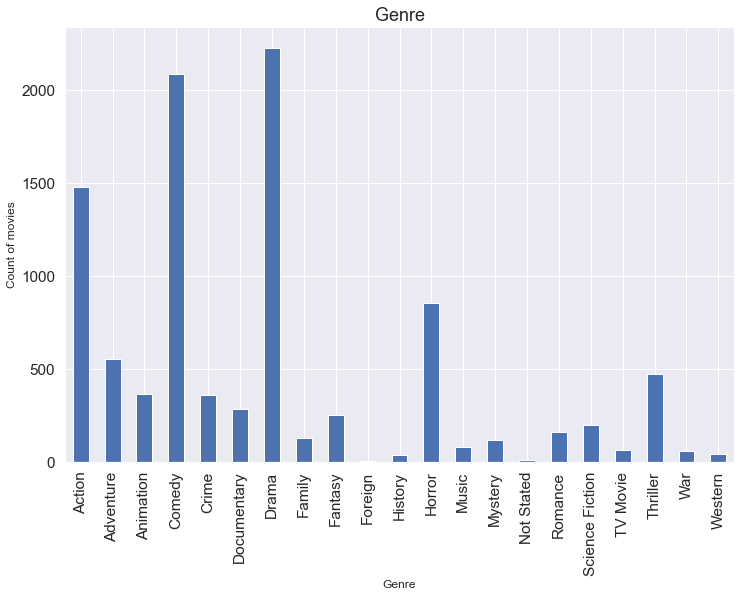

In [44]:
plt.figure(figsize = [12, 8])
plt.title(" Genre ", fontsize=18); plt.ylabel('Count of movies',fontsize=12);
plt.xlabel('Genre',fontsize=12);
df['genre_1'].value_counts().sort_index().plot.bar(figsize=(12,8))


#### Ans_Q5: the drama was the most popular genre, followed by comedy.

### Q6: Was there a change in the number of movies released over time?

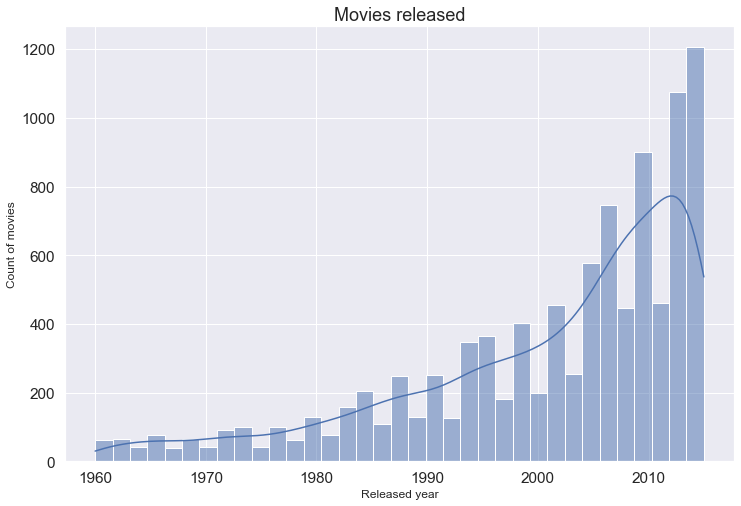

In [45]:
plt.figure(figsize = [12, 8])
plt.title(" Movies released ", fontsize=18); plt.ylabel('Count of movies',fontsize=12);
plt.xlabel('Released year',fontsize=12);
sn.histplot(x='release_year', data=df, kde=True)
 
plt.show()

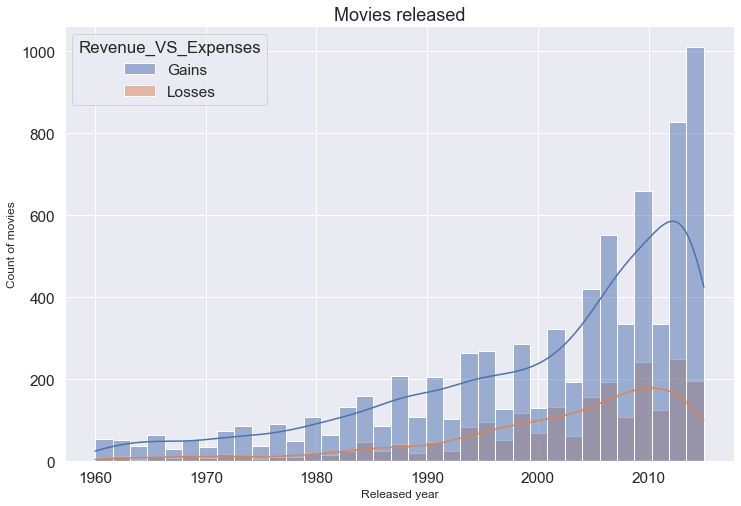

In [46]:
plt.figure(figsize = [12, 8])
plt.title(" Movies released ", fontsize=18); plt.ylabel('Count of movies',fontsize=12);
plt.xlabel('Released year',fontsize=12);

sn.histplot(x='release_year', data=df, kde=True, hue='Revenue_VS_Expenses')
 
plt.show()

#### Ans_Q6: for sure there is an effect on movies released over time and of course will be increas due to the development of instruments and the presence of contemporary technology, which aid in and significantly reduce the amount of time it takes to make a movie, and we can see effect of the gains and losses with the nunber movies released over time.

<a id='conclusions'></a>
## Conclusions
> After analyzing the data, it was determined that the month with the most movies produced was September, the interval from 5.8 to 6.8 was the most popular vote average for all movies, there is 5000 movies get good ratings Including 4000 movies that was gains and 1000 movies that losses, the most popular interval runtime were between 90 to 110 per minute, the drama was the most popular genre, followed by comedy.

### Limitations
> The data was devoid of repetitive and missing numbers, but it did not appear to be complete to me. It would be preferable if there was a column that displayed the movie's producing nation, the number of views, and the number of downloads.


#### Resources:
* https://pandas.pydata.org/docs/index.html
* https://www.dataquest.io/blog/plot-dataframe-pandas/
* https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/
* https://www.simplilearn.com/tutorials/python-tutorial/data-visualization-in-python
* https://stackoverflow.com/